## Importação das bibliotecas utilizadas

In [1]:
import xlrd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Criação dos data frames para importação dos dados de todas as tabelas

In [2]:
df_fnt = pd.read_excel('STG_FNT_ITT.xlsx')
df_mdl = pd.read_excel('STG_MDL.xlsx')
df_pgt = pd.read_excel('STG_PGT.xlsx')
df_opr = pd.read_excel('STG_OPR_ITT.xlsx')
df_mvt = pd.read_excel('STG_MVT_CRD.xlsx')

## Criação das Listas para posterior Análise de Integridade

In [3]:
confiab_fnt = []
dupl_fnt = []
compl_fnt = []
dupl_mdl = []
compl_pgt = []
confor_pgt = []
compl_opr = []
confor_opr = []
compl_mvt = []
confor_mvt = []
recen_mvt = []
recen_opr = []
recen_pgt = []

# Análise do Indicador de Confiabilidade

## Tabela STG_FNT_ITT

### 1. Verificando CNPJ + Complemento = 14 dígitos e atribuindo os valores em suas respectivas listas.

In [0]:
total = []
usaveis = []
nao_usaveis = []
cont = 0
for i in range (len(df_fnt)):
    coct = len((str(df_fnt.NUM_CNPJ[i])+str(df_fnt.NUM_CMP_CNPJ[i])))
    total.append(coct)
    if (coct) >= 8 and (coct) <= 14:
        usaveis.append(coct)
    else:
        cont += 1
        nao_usaveis.append(cont)
        df_fnt.drop(i)
a = (len(total)-len(nao_usaveis))*(100/len(total))
confiab_fnt.append(a)

### 2. Checando o tamanho das listas

In [96]:

len(usaveis), len(nao_usaveis), len(total)

(650, 358, 1008)

### 3. Representação Gráfica

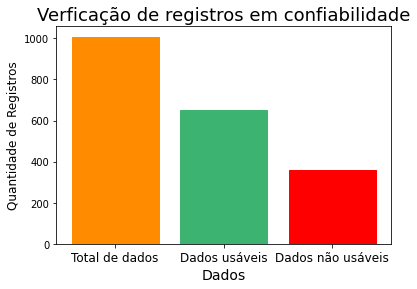

In [97]:
Registros=['Total de dados', 'Dados usáveis', 'Dados não usáveis']
Valores=[len(total), len(usaveis), len(nao_usaveis)]

barlist=plt.bar(Registros,[len(total), len(usaveis), len(nao_usaveis)])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#FF0000')

plt.xticks(Registros, fontsize=12)
plt.ylabel('Quantidade de Registros',fontsize=12)
plt.xlabel('Dados',fontsize=14)
plt.title('Verficação de registros em confiabilidade',fontsize=18)

plt.show()

# Análise do Indicador de Duplicidade

## Tabela STG_FNT_ITT

### 1. Criação de uma coluna no dataframe

In [0]:
df_fnt['Ver']=''

### 2. Concatenação das colunas NUM_CNPJ e NUM_CMP_CNPJ e inclusão na coluna Ver

In [185]:
total_dupl = []
usaveis_dupl = []
nao_usaveis_dupl = []
for i in range (len(df_fnt)):
    df_fnt.loc[i,'Ver']= (str(df_fnt.NUM_CNPJ[i])+str(df_fnt.NUM_CMP_CNPJ[i]))
len(usaveis_dupl)

0

### 3. Análise da duplicidade

In [178]:
## Exibe o primeiro registro, descartando os duplicados.
print(df_fnt['Ver'].drop_duplicates())

0          24278840872805
1         121826744872635
2         161673281681802
3           2799259782329
4         205790368602397
              ...        
1003      119010465881972
1004     1776560336413056
1005    17765603364165138
1006    17765603364238697
1007    17765603364250206
Name: Ver, Length: 1008, dtype: object


In [187]:
Ndupl=(df_fnt['Ver'].drop_duplicates())

0          24278840872805
1         121826744872635
2         161673281681802
3           2799259782329
4         205790368602397
              ...        
1003      119010465881972
1004     1776560336413056
1005    17765603364165138
1006    17765603364238697
1007    17765603364250206
Name: Ver, Length: 1008, dtype: object

### 4. Verficação de quantidade registros não duplicados

In [186]:
nd=len(Ndupl)

1008

### 5. Verficação de quantidade de registros total do dataframe

In [0]:
total= len(df_fnt)

### 6. Verificação de quantidade de registros duplicados.

In [104]:
dupl = total-nd
dupl_fnt.append(nd*(100/total))
total, nd, dupl

(1008, 1008, 0)

### 7. Representação gráfica

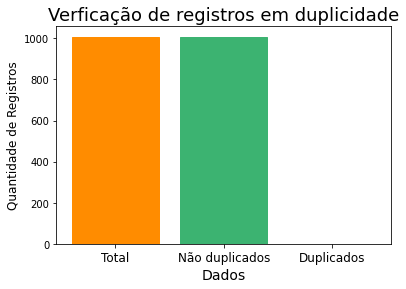

In [105]:
Registros=['Total', 'Não duplicados', 'Duplicados']
Valores=[total,nd,dupl]

barlist=plt.bar(Registros,[total,nd,dupl])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#FF0000')

plt.xticks(Registros, fontsize=12)
plt.ylabel('Quantidade de Registros',fontsize=12)
plt.xlabel('Dados',fontsize=14)
plt.title('Verficação de registros em duplicidade',fontsize=18)

plt.show()

## Tabela STG_MDL

### 1. Análise da duplicidade

In [106]:
print(any(df_mdl['COD_MDL'].duplicated()) or (df_mdl['DES_MDL'].duplicated() ))

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
Name: DES_MDL, dtype: bool


### 1. Verificação da quantidade de registros no dataframe

In [0]:
total=len(df_mdl)

### 2. Criação de um novo dataframe com os dados não duplicados

In [108]:
Ndupl=(df_mdl['DES_MDL'].drop_duplicates())
Ndupl

0                         ADIANTAMENTO DEPOSITANTE
1                            OUTROS FINANCIAMENTOS
2                                CARTAO DE CREDITO
3                              TITULOS DESCONTADOS
4                     EMPRESTIMO - CAPITAL DE GIRO
5                     EMPRESTIMO - CREDITO PESSOAL
6                CHEQUE ESPECIAL E CONTA GARANTIDA
7                 FINANCIAMENTO - IMOBILIARIOS SFH
8         FINANCIAMENTO - IMPORTACAO  E EXPORTACAO
9                        EMPRESTIMO - MICROCREDITO
10                    FINANCIAMENTO - MICROCREDITO
11                   FINANCIAMENTO - ARREENDAMENTO
12                       AVAIS E FIANCASA HONRADOS
13            FINANCIAMENTO - IMOBILIARIO (OUTROS)
14                                       CONSORCIO
15                         EMPRESTIMO - CONSIGNADO
16    FINANCIAMENTO - AQUISICAO DE BENS (VEICULOS)
17                              OUTROS EMPRESTIMOS
18          FINANCIAMENTO - RURAL E AGROINDUSTRIAL
Name: DES_MDL, dtype: object

In [109]:
nd=len(Ndupl)
nd

19

### 3. Verificação de registros duplicados

In [110]:
dupl = total - nd
dupl_mdl.append(nd*(100/total))
dupl

0

### 4. Representação gráfica

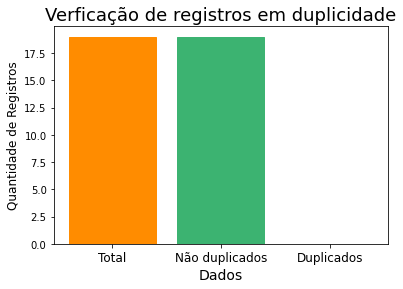

In [111]:
Registros=['Total', 'Não duplicados', 'Duplicados']
Valores=[total,nd,dupl]

barlist=plt.bar(Registros,[total,nd,dupl])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#FF0000')

plt.xticks(Registros, fontsize=12)
plt.ylabel('Quantidade de Registros',fontsize=12)
plt.xlabel('Dados',fontsize=14)
plt.title('Verficação de registros em duplicidade',fontsize=18)

plt.show()

# Análise do Indicador de Completude

## Tabela STG_PGT

### 1. Verificando completude das colunas

In [112]:
cont1, cont2, cont3, cont4, cont5, cont6, cont7, cont8, cont9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
total = len(df_pgt)
for i in range (len(df_pgt)):
    if (str(df_pgt.VLR_PGT_FAT) == ''):
        cont1 += 1
    if (str(df_pgt.DAT_VCT) == ''):
        cont2 += 1
    if (str(df_pgt.COD_MDL) == ''):
        cont3 += 1
    if (str(df_pgt.QTD_CLI_CAD_POS) == ''):
        cont4 += 1
    if (str(df_pgt.QTD_PGT) == ''):
        cont5 += 1
    if (str(df_pgt.ID_FNT_ITT) == ''):
        cont6 += 1
    if (str(df_pgt.DES_TIP_PSS) == ''):
        cont7 += 1
    if (str(df_pgt.DAT_RSS_FNT_ITT) == ''):
        cont8 += 1
    if (str(df_pgt.DAT_INC_DBO) == ''):
        cont9 += 1
nulos = cont1 + cont2 + cont3 + cont4 + cont5 + cont6 + cont7 + cont8 + cont9
compl_pgt.append((total-nulos)*(100/total))

total, nulos

(15446, 0)

### 2. Representação gráfica

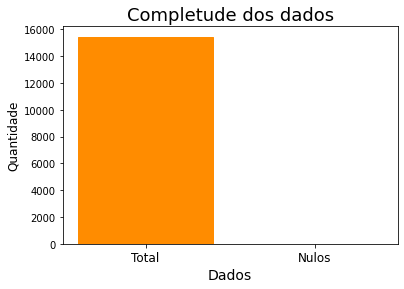

In [113]:
dados = ['Total', 'Nulos']
valores = [total, nulos]

barlist = plt.bar(dados,[total,nulos])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#FF0000')

plt.xticks(dados, fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Completude dos dados', fontsize=18)

plt.show()

## Tabela STG_OPR_ITT

### 1. Verificando completude das colunas

In [114]:
total = len(df_opr)
cont1, cont2, cont3, cont4, cont5, cont6, cont7, cont8, cont9 = 0, 0, 0, 0, 0, 0, 0, 0, 0
for i in range (len(df_opr)):
    if (str(df_opr.ID_MDL[i]) == 'C01' and str(df_opr.VLR_CTRD_CSC) == ''):
        cont1 += 1
    if (str(df_opr.ID_MDL[i]) == 'C01' and str(df_opr.VLR_SDO_DDR) == ''):
        cont2 += 1
    if (str(df_opr.QTD_PCL) == ''):
        cont3 += 1
    if (str(df_opr.QTD_CLI_CAD_POS) == ''):
        cont4 += 1
    if (str(df_opr.QTD_OPR) == ''):
        cont5 += 1
    if (str(df_opr.ID_FNT_ITT) == ''):
        cont6 += 1
    if (str(df_opr.ID_MDL) == ''):
        cont7 += 1
    if (str(df_opr.DES_TIP_PSS) == ''):
        cont8 += 1
    if (str(df_opr.DAT_INC_DBO) == ''):
        cont9 += 1

nulos = cont1 + cont2 + cont3 + cont4 + cont5 + cont6 + cont7 + cont8 + cont9
compl_opr.append((total-nulos)*(100/total))

total, nulos

(891, 0)

### 2. Representação gráfica

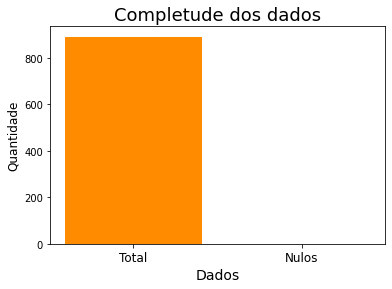

In [115]:
dados = ['Total', 'Nulos']
valores = [total, nulos]

barlist = plt.bar(dados,[total,nulos])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#FF0000')

plt.xticks(dados, fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Completude dos dados', fontsize=18)

plt.show()

## Tabela STG_MVT_CRD

### 1. Verificando completude das colunas

In [116]:
total = len(df_mvt)
cont1, cont2, cont3, cont4 = 0, 0, 0, 0
for i in range (len(df_mvt)):
    if (str(df_mvt.COD_MDL[i]) == 'E01' and str(df_mvt.VLR_SDO_UTZ_CRD_RTO) == ''):
        cont1 += 1
    if (str(df_mvt.COD_MDL[i]) == 'D01' and str(df_mvt.VLR_TOT_FAT) == ''):
        cont2 += 1
    if (str(df_mvt.COD_MDL[i]) == 'D01' and str(df_mvt.VLR_MIM_FAT) == ''):
        cont3 += 1
    if (str(df_mvt.VLR_PCL_FAT) == ''):
        if (str(df_mvt.COD_MDL[i]) != 'D01') and (str(df_mvt.COD_MDL[i]) != 'E01'):
            cont4 += 1

nulos = cont1 + cont2 + cont3 + cont4
compl_mvt.append((total-nulos)*(100/total))

total, nulos

(15, 0)

### 2. Representação gráfica

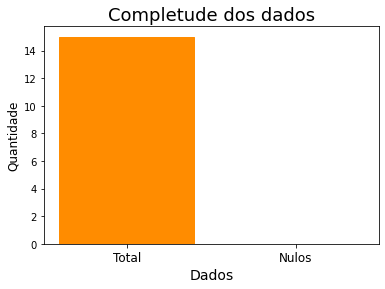

In [117]:

dados = ['Total', 'Nulos']
valores = [total, nulos]

barlist = plt.bar(dados,[total,nulos])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#FF0000')

plt.xticks(dados, fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Completude dos dados', fontsize=18)

plt.show()

## Tabela STG_FNT_ITT

### 1. Verificando completude das colunas

In [118]:
total = len(df_fnt)
cont1, cont2, cont3, cont4 = 0, 0, 0, 0
for i in range (len(df_fnt)):
    if (str(df_fnt.NUM_CNPJ) == ''):
        cont1 += 1
    if (str(df_fnt.NUM_CMP_CNPJ) == ''):
        cont2 += 1
    if (str(df_fnt.NOM_COM) == ''):
        cont3 += 1
    if (str(df_fnt.NOM_RAZ_SCL) == ''):
        cont4 += 1

nulos = cont1 + cont2 + cont3 + cont4
compl_fnt.append((total-nulos)*(100/total))

total, nulos

(1008, 0)

### 2. Representação gráfica

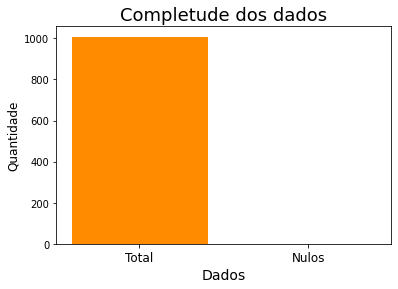

In [119]:

dados = ['Total', 'Nulos']
valores = [total, nulos]

barlist = plt.bar(dados,[total,nulos])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#FF0000')

plt.xticks(dados, fontsize=12)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Completude dos dados', fontsize=18)

plt.show()

# Análise do Indicador de Conformidade

## Tabela STG_MVT_CRD

## 1. Conformidade quanto ao códigos de modalidade válidos

### 1.1 Criação de uma lista dos códigos de modalidade

In [0]:
lista=[]
for i in range (len(df_mdl)):
    a= df_mdl.COD_MDL[i]
    lista.append(a)

In [121]:
lista

['E02',
 'B99',
 'D01',
 'G01',
 'A02',
 'A04',
 'E01',
 'B03',
 'B02',
 'A05',
 'B04',
 'B07',
 'F01',
 'B06',
 'C01',
 'A01',
 'B05',
 'A99',
 'B01']

### 1.2 Verficação da tabela STG_MVT_CRD contém os códigos da modalidade

In [122]:
conf =len(df_mvt.loc[df_mvt['COD_MDL'].isin(lista)])

# Verificação da quantidade de registros que possuem o código de modalidade válido.
conf

15

### 1.3 Verificação de quantidade de registro da tabela STG_MVT_CRD

In [123]:
total=len(df_mvt)

total

15

### 1.4 Verificação de % registros conforme baseado nos códigos de modalidade válidos

In [124]:
n_conforme= (total-conf) *100/total
conforme = 100 - n_conforme
confor_mvt.append(conforme)

n_conforme, conforme


(0.0, 100.0)

### 1.5 Representação gráfica

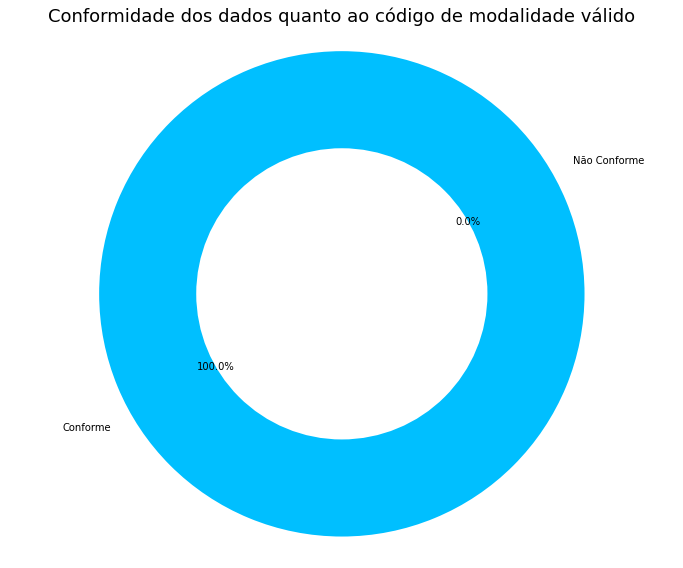

In [125]:
labels = ['Conforme', 'Não Conforme']
sizes = [conforme, n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código de modalidade válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 2. Vericação se o campo DES_TIP_PSS está no padrão

### 2.1 Criação de lista para verificação de padrão

In [126]:
## Criação de uma lista para verificar de existência de registros no padrão F(Pessoa Física)  e J(Pessoa Jurídica)
listafjM=['F','J']

## Criação de lista para verificação de existência de registros fora do padrão f e j ( letras minúsculas)
listafjm=['f','j']

listafjM, listafjm

(['F', 'J'], ['f', 'j'])

In [127]:
## Atribuição a uma variável o números de registros válidos com F e J
conffjM =len(df_mvt.loc[df_mvt['DES_TIP_PSS'].isin(listafjM)])

## Atribuição a uma variável o números de registros fora do padrão f e j (letras minúsculas) 
conffjm =len(df_mvt.loc[df_mvt['DES_TIP_PSS'].isin(listafjm)])

conffjM , conffjm


(15, 0)

### 2.2 Cálculo de porcentagem de dados conforme e não conforme quanto à Pessoa Física ou Jurídica

In [0]:
FJ = conffjM *100/total
fj = conffjm*100/total
difFJ = (total-conffjM)*100/total
confor_mvt.append(FJ)


### 2.3 Representação Gráfica

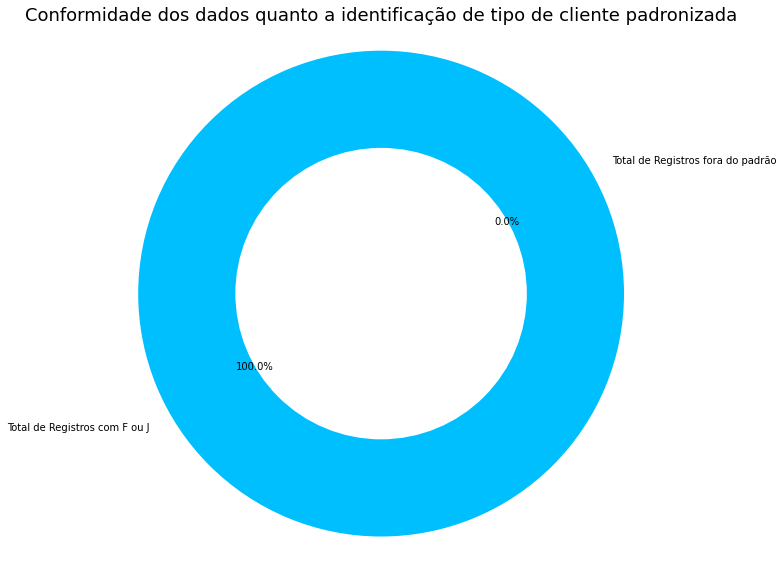

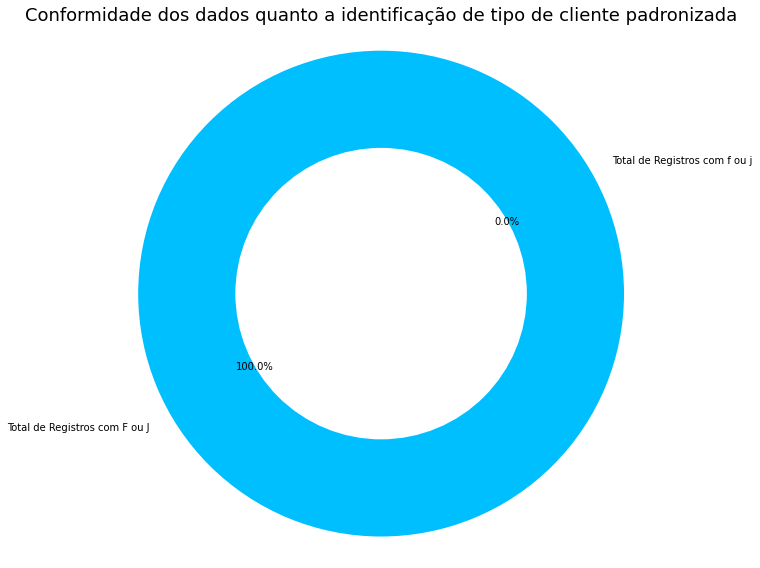

In [129]:
labels = ['Total de Registros com F ou J', 'Total de Registros fora do padrão']
sizes = [FJ, difFJ]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()



labels = ['Total de Registros com F ou J', 'Total de Registros com f ou j']
sizes = [FJ, fj]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 3. Verificação do campo ID_FNT_ITT da tabela STG_MVT_CRD se está de acordo com a tabela STG_FNT_ITT

### 3.1 Criação de uma lista das fontes existentes

In [0]:
listafontes=[]
for i in range (len(df_fnt)):
    a= df_fnt.ID_STG_FNT_ITT[i]
    listafontes.append(a)

### 3.2 Verficação da tabela STG_MVT_CRD contém fontes válidas

In [131]:
conf_fontes =len(df_mvt.loc[df_mvt['ID_FNT_ITT'].isin(listafontes)])

conf_fontes

15

### 3.3 Verificação de % registros conforme baseado na identificação de fonte válidas

In [0]:
fontes = conf_fontes *100/total
fontesnconf = (total-conf_fontes)*100/total
confor_mvt.append(fontes)

### 3.4 Representação gráfica

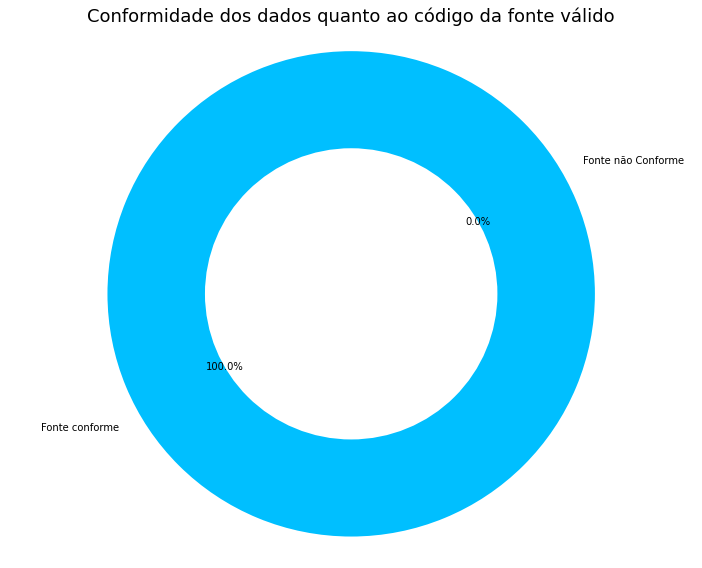

In [133]:
labels = ['Fonte conforme', 'Fonte não Conforme']
sizes = [fontes, fontesnconf]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código da fonte válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Alteração de formato do campo VLR_PCL_FAT

### 4.1 Alterando formato string para float no campo VLR_PGT_FAT

In [0]:
df_mvt.VLR_PCL_FAT = df_mvt.VLR_PCL_FAT.astype(float)

### 4.2 Salvando o dataframe alterado em um Novo arquivo xlsx

In [0]:
#df.to_excel("STG_MVT_CRD_Novo.xlsx") 

## Tabela STG_OPR_ITT

## 1. Conformidade quanto aos códigos de modalidade válidos

### 1.1 Criação de uma lista dos códigos de modalidade

In [136]:
lista = []
for i in range(len(df_mdl)):
  a = df_mdl.COD_MDL[i]
  lista.append(a)
    
lista

['E02',
 'B99',
 'D01',
 'G01',
 'A02',
 'A04',
 'E01',
 'B03',
 'B02',
 'A05',
 'B04',
 'B07',
 'F01',
 'B06',
 'C01',
 'A01',
 'B05',
 'A99',
 'B01']

### 1.2 Verificação da tabela STG_OPR_ITT contém os códigos de modalidade

In [137]:
conf = len(df_opr.loc[df_opr['ID_MDL'].isin(lista)])

#Verificação da quantidade de registros que possuem o código de modalidade válido.
conf

891

### 1.3 Verificação da quantidade de registros da tabela STG_OPR_ITT

In [138]:
total = len(df_opr)

total

891

### 1.4 Verificação de % de registros conforme baseado nos códigos de modalidade

In [139]:
n_conforme= (total-conf) *100/total
conforme = 100 - n_conforme
confor_opr.append(conforme)

conforme, n_conforme

(100.0, 0.0)

### 1.5 Representação Gráfica

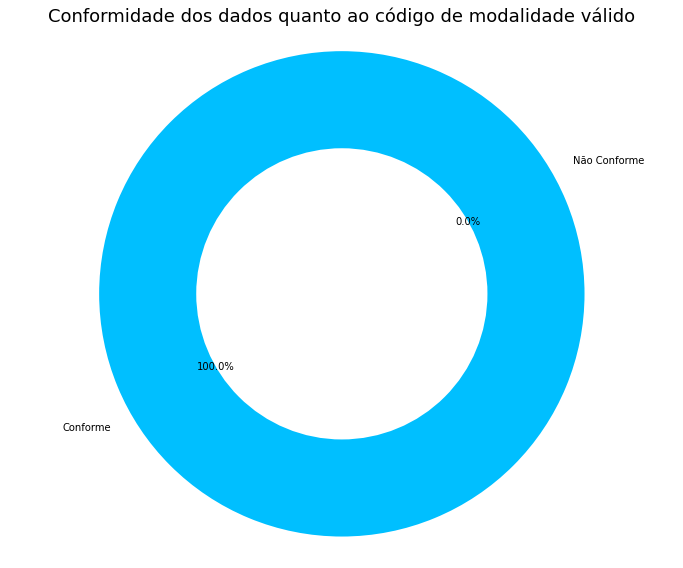

In [140]:
labels = ['Conforme', 'Não Conforme']
sizes = [conforme, n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código de modalidade válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 2. Verificação se o campo DES_TIP_PSS está preenchido dentro do padrão

### 2.1 Criação de uma lista para verificação de padrão

In [141]:
## Criação de uma lista para verificar existência de registros no padrão F(Pessoa Física)  e J(Pessoa Jurídica)
listafjM=['F','J']

## Criação de lista para verificação existência de registros fora do padrão f e j ( letras minúsculas)
listafjm=['f','j']

listafjM, listafjm

(['F', 'J'], ['f', 'j'])

In [142]:
## Atribuição a uma variável os números de registros válidos com F e J
conffjM =len(df_opr.loc[df_opr['DES_TIP_PSS'].isin(listafjM)])

## Atribuição a uma variável os números de registros fora do padrão f e j (letras minúsculas) 
conffjm =len(df_opr.loc[df_opr['DES_TIP_PSS'].isin(listafjm)])

conffjM , conffjm

(891, 0)

### 2.2 Cálculo de porcentagem de dados conforme e não conforme quanto à Pessoa Física ou Jurídica

In [0]:
FJ = conffjM *100/total
fj = conffjm*100/total
difFJ = (total-conffjM)*100/total
confor_opr.append(FJ)


### 2.3 Representação Gráfica

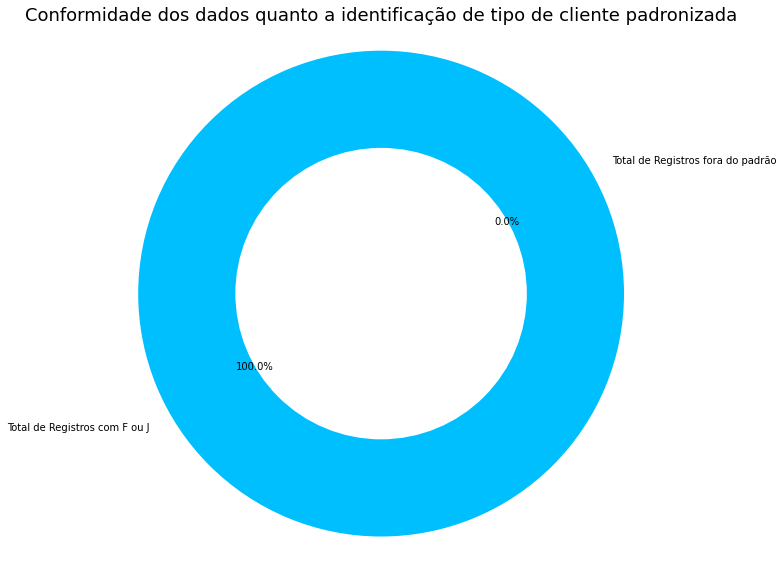

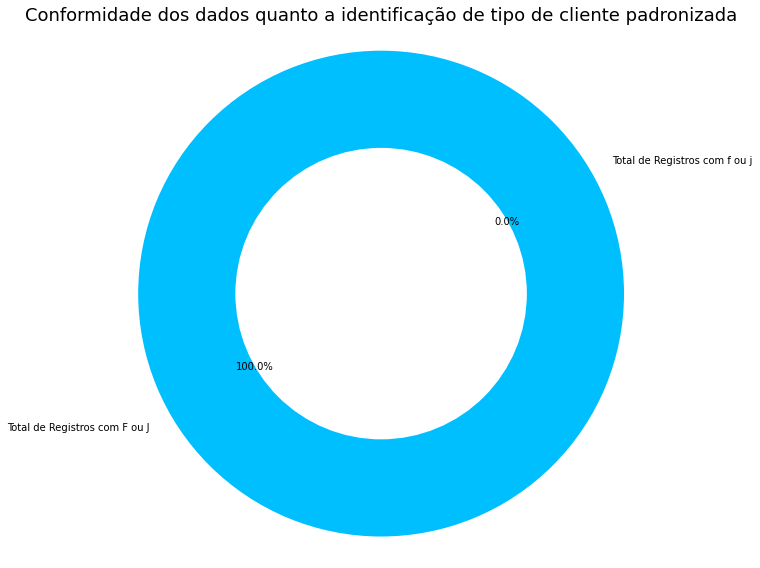

In [144]:
labels = ['Total de Registros com F ou J', 'Total de Registros fora do padrão']
sizes = [FJ, difFJ]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()



labels = ['Total de Registros com F ou J', 'Total de Registros com f ou j']
sizes = [FJ, fj]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 3. Verificação do campo ID_FNT_ITT da tabela STG_OPR_ITT se está de acordo com a tabela STG_FNT_ITT

### 3.1 Verficação da tabela STG_OPR_ITT contém fontes válidas

In [145]:
conf_fontes =len(df_opr.loc[df_opr['ID_FNT_ITT'].isin(listafontes)])

conf_fontes

891

### 3.2 Verificação de % registros conforme baseado na identificação de fonte válidas

In [0]:
fontes = conf_fontes *100/total
fontesnconf = (total-conf_fontes)*100/total
confor_opr.append(fontes)

### 3.3 Representação Gráfica

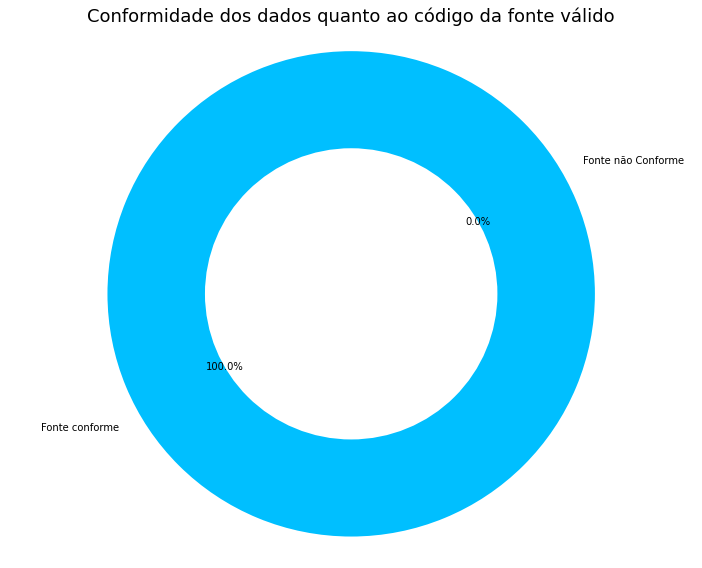

In [147]:
labels = ['Fonte conforme', 'Fonte não Conforme']
sizes = [fontes, fontesnconf]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código da fonte válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Verificação da relação entre os campos QTD_OPR e QTD_CLI_CAD_POS (quantidade de operações ser maior ou igual a quantidade de clientes)

### 4.1 Verificação da relação padrão entre os campos

In [0]:
rel_conforme = 0
rel_n_conforme = 0
for i in range(len(df_opr)):
  if df_opr.QTD_OPR[i] >= df_opr.QTD_CLI_CAD_POS[i]:
    rel_conforme = rel_conforme +1
  else:
    rel_n_conforme = rel_n_conforme +1

### 4.2 Verificação de porcentagem de registros com relações conforme e não conforme

In [0]:
rel_n_conforme = (rel_conforme - total) *100/total
rel_conforme = rel_conforme *100/total
confor_opr.append(rel_conforme)

### 4.3 Representação Gráfica

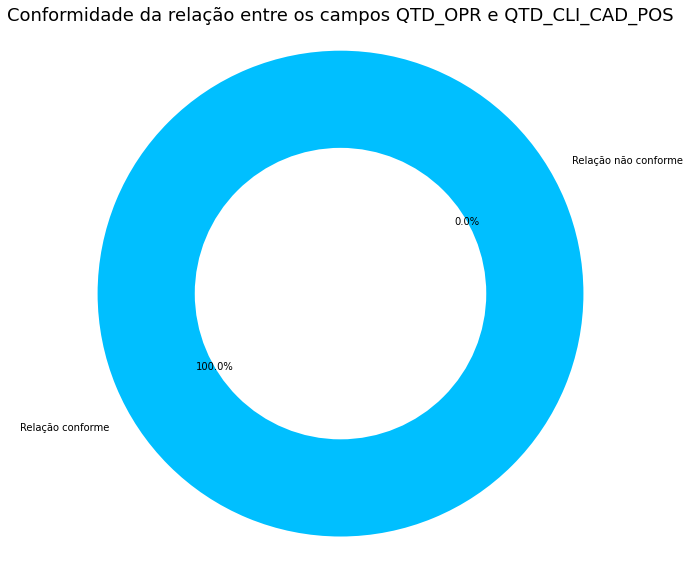

In [150]:
labels = ['Relação conforme', 'Relação não conforme']
sizes = [rel_conforme, rel_n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade da relação entre os campos QTD_OPR e QTD_CLI_CAD_POS', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 5. Alteração de formato dos campos VLR_CTRD_CSC e VLR_SDO_DDR

### 5.1 Alterando formato string para float nos campos VLR_CTRD_CSC e VLR_SDO_DDR

In [0]:
df_opr.VLR_CTRD_CSC = df_opr.VLR_CTRD_CSC.astype(float)
df_opr.VLR_SDO_DDR = df_opr.VLR_SDO_DDR.astype(float)

### 5.2 Salvando o dataframe alterado em um novo arquivo xlsx

In [0]:
#df1.to_excel("STG_OPR_ITT_Novo.xlsx")

## Tabela STG_PGT

## 1. Conformidade quanto ao códigos de modalidade válidos

### 1.1 Criação de uma lista dos códigos de modalidade

In [153]:
lista=[]
for i in range (len(df_mdl)):
    a= df_mdl.COD_MDL[i]
    lista.append(a)
    
lista

['E02',
 'B99',
 'D01',
 'G01',
 'A02',
 'A04',
 'E01',
 'B03',
 'B02',
 'A05',
 'B04',
 'B07',
 'F01',
 'B06',
 'C01',
 'A01',
 'B05',
 'A99',
 'B01']

### 1.2 Verficação da tabela STG_PGT contém os códigos da modalidade

In [154]:
conf =len(df_pgt.loc[df_pgt['COD_MDL'].isin(lista)])

# Verificação da quantidade de registros que possuem o código de modalidade válido.
conf

15446

### 1.3 Verificação de quantidade de registro da tabela STG_PGT

In [155]:
total=len(df_pgt)

total

15446

### 1.4 Verificação de % registros conforme baseado nos códigos de modalidade válidos

In [156]:
n_conforme= (total-conf) *100/total
conforme = 100 - n_conforme
confor_pgt.append(conforme)

n_conforme, conforme

(0.0, 100.0)

### 1.5 Representação gráfica

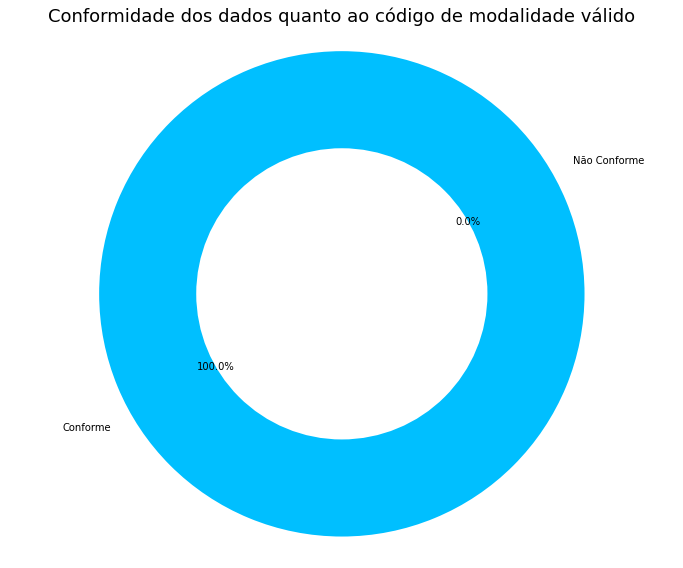

In [157]:
labels = ['Conforme', 'Não Conforme']
sizes = [conforme, n_conforme]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código de modalidade válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 2. Vericação se o campo DES_TIP_PSS está no padrão

### 2.1 Criação de lista para verificação de padrão

In [158]:
## Criação de uma lista para verificar de existência de registros no padrão F(Pessoa Física)  e J(Pessoa Jurídica)
listafjM=['F','J']

## Criação de lista para verificação de existência de registros fora do padrão f e j ( letras minúsculas)
listafjm=['f','j']


listafjM, listafjm

(['F', 'J'], ['f', 'j'])

In [159]:
## Atribuição a uma variável o números de registros válidos com F e J
conffjM =len(df_pgt.loc[df_pgt['DES_TIP_PSS'].isin(listafjM)])

## Atribuição a uma variável o números de registros fora do padrão f e j (letras minúsculas) 
conffjm =len(df_pgt.loc[df_pgt['DES_TIP_PSS'].isin(listafjm)])

conffjM , conffjm

(15446, 0)

### 2.2 Cálculo de porcentagem de dados conforme e não conforme quanto à Pessoa Física ou Jurídica

In [0]:
FJ = conffjM *100/total
fj = conffjm*100/total
difFJ = (total-conffjM)*100/total
confor_pgt.append(FJ)


### 2.3 Representação Gráfica

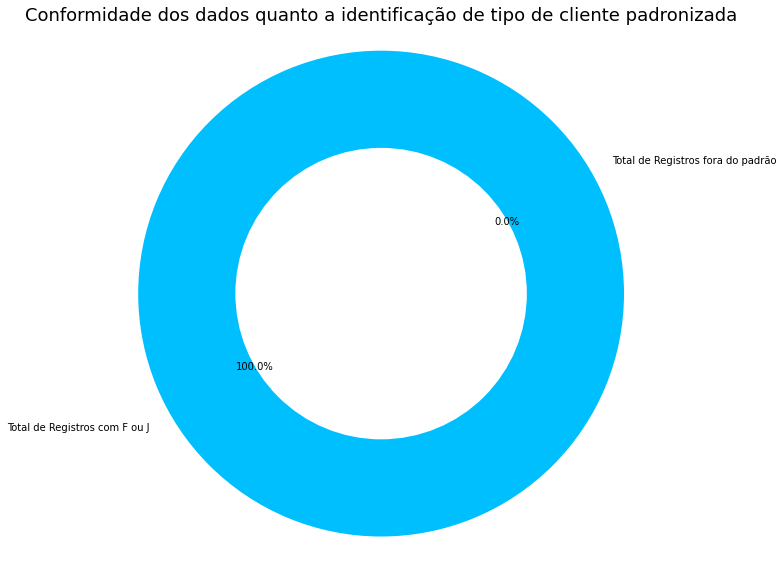

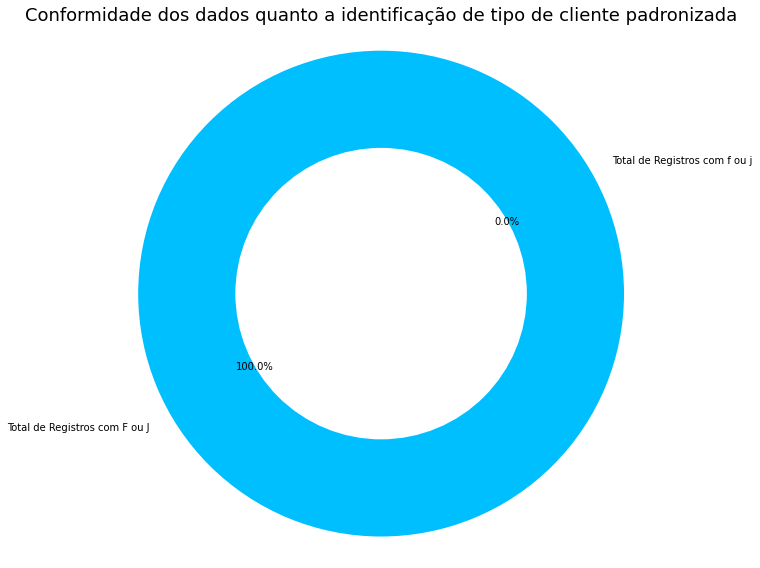

In [161]:
labels = ['Total de Registros com F ou J', 'Total de Registros fora do padrão']
sizes = [FJ, difFJ]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()



labels = ['Total de Registros com F ou J', 'Total de Registros com f ou j']
sizes = [FJ, fj]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto a identificação de tipo de cliente padronizada', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 3. Verificação do campo ID_FNT_ITT da tabela STG_PGT se está de acordo com a tabela STG_FNT_ITT

### 3.1 Verficação da tabela STG_PGT contém fontes válidas

In [162]:
conf_fontes =len(df_pgt.loc[df_pgt['ID_FNT_ITT'].isin(listafontes)])

conf_fontes

15446

### 3.2 Verificação de % registros conforme baseado na identificação de fonte válidas

In [0]:
fontes = conf_fontes *100/total
fontesnconf = (total-conf_fontes)*100/total
confor_pgt.append(fontes)

### 3.3 Representação gráfica

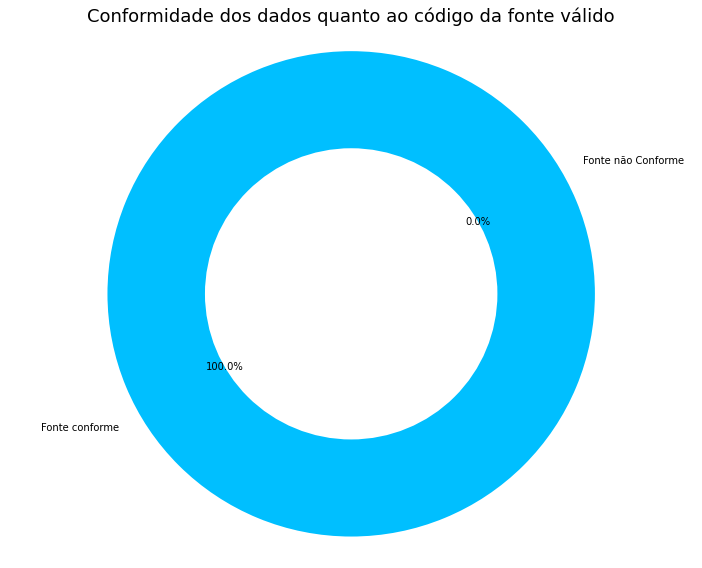

In [164]:
labels = ['Fonte conforme', 'Fonte não Conforme']
sizes = [fontes, fontesnconf]

colors = ['DeepSkyBlue','#00BFFF']
 
fig2, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=30)

centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Conformidade dos dados quanto ao código da fonte válido', fontsize = 18)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 4. Alteração de formato do campo VLR_PGT_FAT

### 4.1 Alterando formato string para float no campo VLR_PGT_FAT

In [0]:
df_pgt.VLR_PGT_FAT = df_pgt.VLR_PGT_FAT.astype(float)

### 4.2 Salvando o dataframe alterado em um Novo arquivo xlsx

In [0]:
#df.to_excel("STG_PGT_Novo.xlsx") 

# Análise do Indicador de Recência

### 1.1 Verificando recência da tabela STG_PGT

In [4]:
#Contando a quantidade de itens na coluna DAT_RSS_FNT_ITT.
view_pgt = df_pgt[['ID_STG_PGT', 'DAT_RSS_FNT_ITT']]
DAT_RSS_FNT_ITT = view_pgt.groupby('DAT_RSS_FNT_ITT').count()

#Contando a quantidade de itens na coluna DAT_INC_DBO.
view_pgt = df_pgt[['ID_STG_PGT', 'DAT_INC_DBO']]
DAT_INC_DBO = view_pgt.groupby('DAT_INC_DBO').count()

colunas = [DAT_RSS_FNT_ITT, DAT_INC_DBO]

ids_pgt = []
valores_pgt = []

for coluna in colunas:
    for x in coluna['ID_STG_PGT'].to_dict().items():
        ids_pgt.append(x[0])
        valores_pgt.append(x[1])
    
tabela_pgt =  pd.DataFrame({'ALTERAÇÃO(ÕES)' : [x for x in ids_pgt], 
                         'OCORRÊNCIA (%)' : [x * 100 / view_pgt.shape[0] for x in valores_pgt]}, 
                        index = ['DAT_RSS_FNT_ITT', 'DAT_INC_DBO'])
a = (valores_pgt[0])
b = (valores_pgt[1])
recen_pgt.append(a*(100/len(df_pgt)))
recen_pgt.append(b*(100/len(df_pgt)))


ids_pgt, recen_pgt

(['2020-01-16', '2020-01-17 17:50:42.746'], [100.0, 100.0])

### 1.2 Representação Gráfica

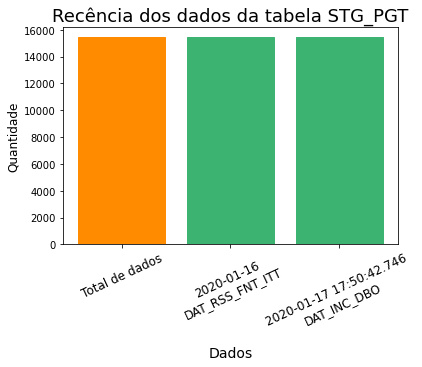

In [5]:
dados = ['Total de dados', '2020-01-16\nDAT_RSS_FNT_ITT', '2020-01-17 17:50:42.746\nDAT_INC_DBO']
n = [len(df_pgt), valores_pgt[0], valores_pgt[1]]

barlist = plt.bar(dados,[len(df_pgt), valores_pgt[0], valores_pgt[1]])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#3CB371')

plt.xticks(dados, fontsize=12, rotation=25)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Recência dos dados da tabela STG_PGT', fontsize=18)

plt.show()

### 2.1Verificando recência da tabela STG_OPR_ITT

In [6]:
#Contando a quantidade de itens na coluna DAT_RSS_FNT_ITT.
view_opr = df_opr[['ID_STG_OPR_ITT', 'DAT_RSS_FNT_ITT']]
DAT_RSS_FNT_ITT = view_opr.groupby('DAT_RSS_FNT_ITT').count()

#Contando a quantidade de itens na coluna DAT_INC_DBO.
view_opr = df_opr[['ID_STG_OPR_ITT', 'DAT_INC_DBO']]
DAT_INC_DBO = view_opr.groupby('DAT_INC_DBO').count()

colunas = [DAT_RSS_FNT_ITT, DAT_INC_DBO]

ids_opr = []
valores_opr = []

for coluna in colunas:
    for x in coluna['ID_STG_OPR_ITT'].to_dict().items():
        ids_opr.append(x[0])
        valores_opr.append(x[1])
    
tabela_opr =  pd.DataFrame({'ALTERAÇÃO(ÕES)' : [x for x in ids_opr], 
                         'OCORRÊNCIA (%)' : [x * 100 / view_opr.shape[0] for x in valores_opr]}, 
                        index = ['DAT_RSS_FNT_ITT', 'DAT_INC_DBO'])
a = (valores_opr[0])
b = (valores_opr[1])
recen_opr.append(a*(100/len(df_opr)))
recen_opr.append(b*(100/len(df_opr)))

tabela_opr

,ALTERAÇÃO(ÕES),OCORRÊNCIA (%)
DAT_RSS_FNT_ITT,2020-01-16,100.0
DAT_INC_DBO,2020-01-27 10:49:48.15,100.0


### 2.2 Representação Gráfica

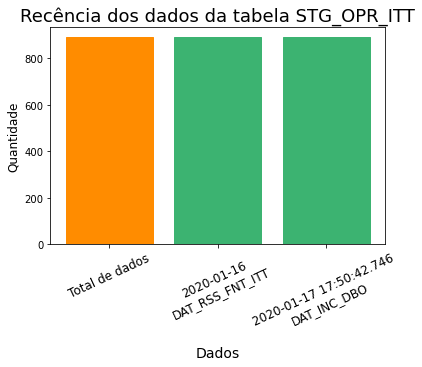

In [7]:
dados = ['Total de dados', '2020-01-16\nDAT_RSS_FNT_ITT', '2020-01-17 17:50:42.746\nDAT_INC_DBO']
n = [len(df_opr), valores_opr[0], valores_opr[1]]

barlist = plt.bar(dados,[len(df_opr), valores_opr[0], valores_opr[1]])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#3CB371')

plt.xticks(dados, fontsize=12, rotation=25)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Recência dos dados da tabela STG_OPR_ITT', fontsize=18)

plt.show()

### 3.1 Verificando recência da tabela STG_OPR_MVT

In [8]:
#Contando a quantidade de itens na coluna DAT_RSS_FNT_ITT.
view_mvt = df_mvt[['ID_STG_MVT_CRD', 'DAT_RSS_FNT_ITT']]
DAT_RSS_FNT_ITT = view_mvt.groupby('DAT_RSS_FNT_ITT').count()

#Contando a quantidade de itens na coluna DAT_INC_DBO.
view_mvt = df_mvt[['ID_STG_MVT_CRD', 'DAT_INC_DBO']]
DAT_INC_DBO = view_mvt.groupby('DAT_INC_DBO').count()

colunas = [DAT_RSS_FNT_ITT, DAT_INC_DBO]

ids_mvt = []
valores_mvt = []

for coluna in colunas:
    for x in coluna['ID_STG_MVT_CRD'].to_dict().items():
        ids_mvt.append(x[0])
        valores_mvt.append(x[1])
    
tabela_mvt =  pd.DataFrame({'ALTERAÇÃO(ÕES)' : [x for x in ids_mvt], 
                         'OCORRÊNCIA (%)' : [x * 100 / view_mvt.shape[0] for x in valores_mvt]}, 
                        index = ['DAT_RSS_FNT_ITT', 'DAT_INC_DBO'])
a = (valores_mvt[0])
b = (valores_mvt[1])
recen_mvt.append(a*(100/len(df_mvt)))
recen_mvt.append(b*(100/len(df_mvt)))


valores_mvt

[15, 15]

### 3.2 Representação Gráfica

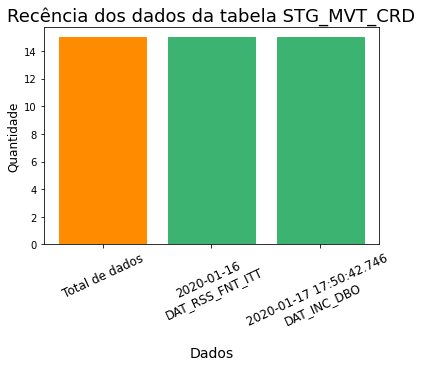

In [9]:
dados = ['Total de dados', '2020-01-16\nDAT_RSS_FNT_ITT', '2020-01-17 17:50:42.746\nDAT_INC_DBO']
n = [len(df_mvt), valores_mvt[0], valores_mvt[1]]

barlist = plt.bar(dados,[len(df_mvt), valores_mvt[0], valores_mvt[1]])
barlist[0].set_color('#FF8C00')
barlist[1].set_color('#3CB371')
barlist[2].set_color('#3CB371')

plt.xticks(dados, fontsize=12, rotation=25)
plt.ylabel('Quantidade', fontsize=12)
plt.xlabel('Dados', fontsize=14)
plt.title('Recência dos dados da tabela STG_MVT_CRD', fontsize=18)

plt.show()

# Análise da Integridade das Tabelas baseada nos Indicadores

In [0]:
confiab_pc = confiab_fnt[0]
dupl_pc = (sum(dupl_fnt)+sum(dupl_mdl))/2
compl_pc = (sum(compl_fnt)+sum(compl_mvt)+sum(compl_opr)+sum(compl_pgt))/4
confor_pc = (sum(confor_mvt)+sum(confor_opr)+sum(confor_pgt))/10
recen_pc = (sum(recen_pgt)+sum(recen_opr)+sum(recen_mvt))/6


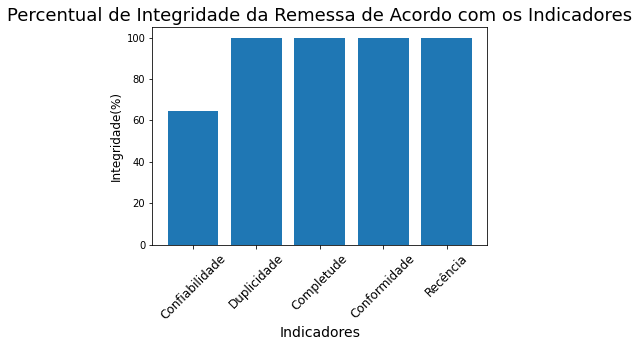

In [174]:
dados = ['Confiabilidade', 'Duplicidade', 'Completude', 'Conformidade', 'Recência']
valores = [confiab_pc, dupl_pc, compl_pc, confor_pc, recen_pc]

barlist = plt.bar(dados,[confiab_pc, dupl_pc, compl_pc, confor_pc, recen_pc])


plt.xticks(dados, fontsize=12, rotation=45)
plt.ylabel('Integridade(%)', fontsize=12)
plt.xlabel('Indicadores', fontsize=14)
plt.title('Percentual de Integridade da Remessa de Acordo com os Indicadores', fontsize=18)

plt.show()